<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [18]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [2]:
import os

os.getcwd()

'C:\\Users\\samhe\\OneDrive\\Documents\\IOD\\module 7'

In [4]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Read data in pandas
df = pd.read_csv(r'C://Users//samhe//OneDrive/Documents/IOD/DATA/transfusion.data')
# Check data has loaded correctly

In [5]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
df.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [11]:
df.columns = ['Recency','Frequency','Monetary','Time','donated_blood_in_March_2007']
df.head(1)

,Recency,Frequency,Monetary,Time,donated_blood_in_March_2007
0,2,50,12500,98,1


In [6]:
for column in df:
    print(df[column].value_counts())
    print("#" * 40)

Recency (months)
2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
8       6
12      6
6       5
13      5
0       5
10      3
38      2
18      2
15      2
22      1
26      1
35      1
40      1
74      1
20      1
17      1
25      1
39      1
72      1
Name: count, dtype: int64
########################################
Frequency (times)
1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
12     14
10     14
14     13
16     13
13      9
15      6
17      4
24      3
21      2
19      2
20      2
22      2
34      1
41      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: count, dtype: int64
########################################
Monetary (c.c. blood)
250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
3000      14
2500      14
3500      13


In [5]:
df.head(1)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1


In [9]:
df['donated_blood_in_March_2007'].value_counts(normalize=True)

donated_blood_in_March_2007
0    0.762032
1    0.237968
Name: proportion, dtype: float64

In [17]:
print ("#"*40,"\nUnique values :  \n\n", df.nunique()) 

######################################## 
Unique values :  

 Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64


In [8]:
df['Frequency'].unique()

array([50, 13, 16, 20, 24,  4,  7, 12,  9, 46, 23,  3, 10,  6,  5, 14, 15,
       11,  8,  2, 19, 17,  1, 22, 18, 38, 43, 34, 44, 26, 41, 21, 33],
      dtype=int64)

In [9]:
df['Frequency'].value_counts()

Frequency
1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
12     14
10     14
14     13
16     13
13      9
15      6
17      4
24      3
21      2
19      2
20      2
22      2
34      1
41      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: count, dtype: int64

In [10]:
df['Monetary'].value_counts()

Monetary
250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
3000      14
2500      14
3500      13
4000      13
3250       9
3750       6
4250       4
6000       3
5250       2
4750       2
5000       2
5500       2
8500       1
10250      1
6500       1
11000      1
12500      1
10750      1
9500       1
4500       1
5750       1
11500      1
8250       1
Name: count, dtype: int64

In [11]:
df[df['Monetary']==250]

,Recency,Frequency,Monetary,Time,donated blood in March 2007
153,2,1,250,2,1
154,2,1,250,2,0
155,2,1,250,2,0
156,2,1,250,2,0
157,2,1,250,2,0
...,...,...,...,...,...
737,23,1,250,23,0
738,23,1,250,23,0
740,23,1,250,23,0
746,39,1,250,39,0


In [12]:
df['Monetary'].max()

12500

In [13]:
df[df['Monetary']==250]

,Recency,Frequency,Monetary,Time,donated blood in March 2007
153,2,1,250,2,1
154,2,1,250,2,0
155,2,1,250,2,0
156,2,1,250,2,0
157,2,1,250,2,0
...,...,...,...,...,...
737,23,1,250,23,0
738,23,1,250,23,0
740,23,1,250,23,0
746,39,1,250,39,0


In [14]:
df[df['Monetary']==1500]['donated blood in March 2007'].value_counts()

donated blood in March 2007
0    35
1    17
Name: count, dtype: int64

In [15]:
df[df['Monetary']==2000]

,Recency,Frequency,Monetary,Time,donated blood in March 2007
29,4,8,2000,21,0
35,2,8,2000,28,1
56,4,8,2000,26,1
61,2,8,2000,35,1
100,4,8,2000,34,1
106,0,8,2000,59,0
113,4,8,2000,40,1
126,4,8,2000,46,1
128,4,8,2000,48,1
184,13,8,2000,26,0


In [16]:
df['Monetary'].unique()

array([12500,  3250,  4000,  5000,  6000,  1000,  1750,  3000,  2250,
       11500,  5750,   750,  2500,  1500,  1250,  3500,  3750,  2750,
        2000,   500,  4750,  4250,   250,  5500,  4500,  9500, 10750,
        8500, 11000,  6500, 10250,  5250,  8250], dtype=int64)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [18]:
corr=df.corr()
corr

,Recency,Frequency,Monetary,Time,donated blood in March 2007
Recency,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency,-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary,-0.182745,1.000000,1.000000,0.634940,0.218633
Time,0.160618,0.634940,0.634940,1.000000,-0.035854
donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


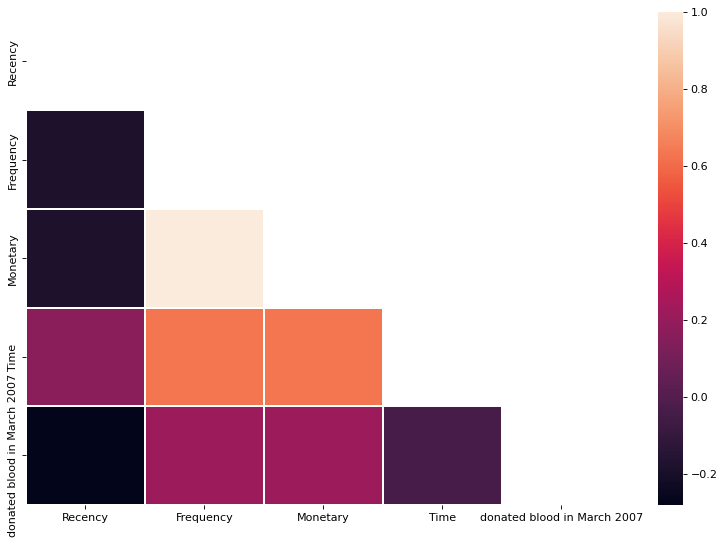

In [19]:

mask = np.zeros_like(df.corr(numeric_only= True), dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True,linewidths=0.2)
plt.show()

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

<Axes: xlabel='Recency', ylabel='Count'>

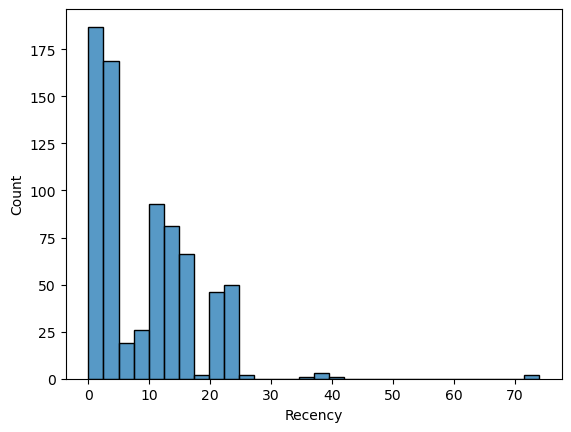

In [20]:
sns.histplot(data= df, x=df['Recency'] )

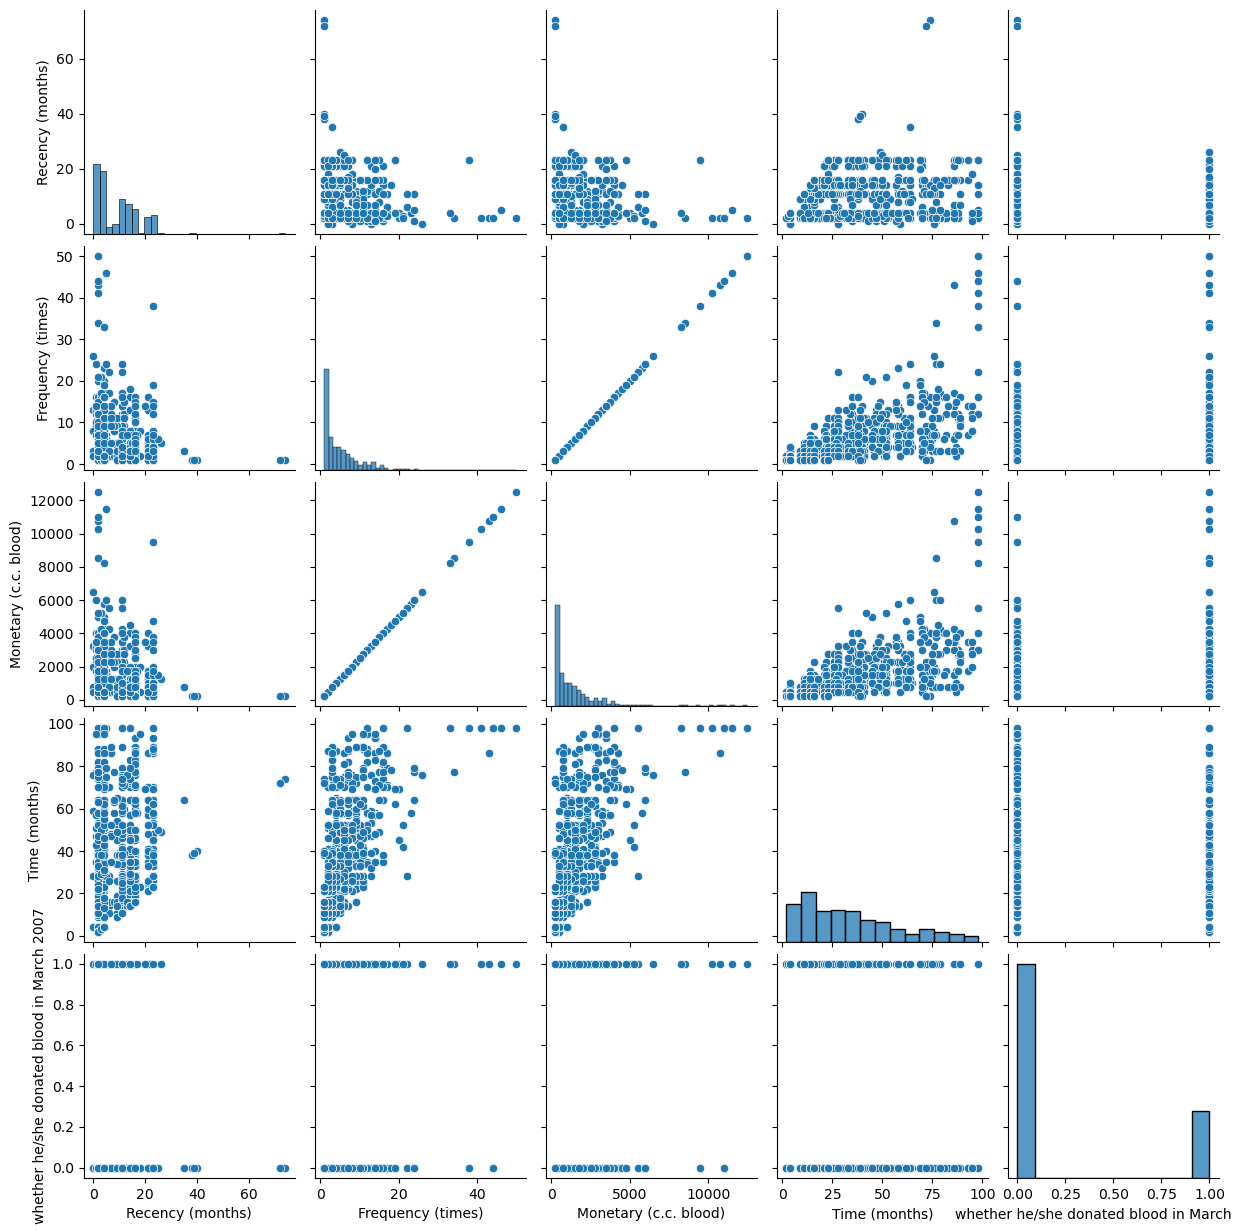

In [56]:
sns.pairplot(df)

In [ ]:
# Perform EDA by investigating each of the points above

In [7]:
donated = df[df['donated_blood_in_March_2007']==1]
donated

,Recency,Frequency,Monetary,Time,donated_blood_in_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
6,2,7,1750,14,1
...,...,...,...,...,...
680,20,14,3500,69,1
695,17,7,1750,58,1
708,11,2,500,38,1
712,14,2,500,35,1


In [11]:
donated['Recency'].value_counts()

Recency
2     66
4     58
11    13
14     9
3      5
9      4
16     4
21     3
6      2
5      2
0      2
1      2
8      1
22     1
26     1
13     1
7      1
20     1
17     1
23     1
Name: count, dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [ ]:
# Filter/subset/clean the data according to your EDA findings

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [12]:
X=df[['Monetary', 'Time']]
y=df ['donated_blood_in_March_2007']

In [14]:
df['donated_blood_in_March_2007'].value_counts()

donated_blood_in_March_2007
0    570
1    178
Name: count, dtype: int64

In [7]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights}

In [28]:
# Split your data
X=df[['Monetary']]
y=df ['donated_blood_in_March_2007']

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
rf = RandomForestClassifier(criterion='gini', max_features=None, random_state=0)
rf.fit(X_train,y_train)


RandomForestClassifier(max_features=None, random_state=0)

In [31]:
rf.score(X_train,y_train)

0.7789661319073083

In [32]:
rf.score(X_test,y_test)

0.7593582887700535

In [35]:
rf_gride= GridSearchCV(rf, param_grid, cv=5, verbose=1)
rf_gride.fit(X_train, y_train)

Fitting 5 folds for each of 3780 candidates, totalling 18900 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=None,
                                              random_state=0),
             param_grid={'class_weight': [{0: 0.001, 1: 0.999},
                                          {0: 0.05357894736842105,
                                           1: 0.9464210526315789},
                                          {0: 0.1061578947368421,
                                           1: 0.8938421052631579},
                                          {0: 0.15873684210526315,
                                           1: 0.8412631578947368},
                                          {0: 0.2113157894736842,
                                           1: 0.7886842105263158},
                                          {0: 0.26389473684210524,
                                           1: 0.73610526315789...
                                          {0: 0.7371052631578947,
                                           1: 0.2628947368421053},
                                          {0: 0.7896842105263158,
                                           1: 0.21031578947368423},
                                          {0: 0.8422631578947368,
                                           1: 0.15773684210526318},
                                          {0: 0.8948421052631579,
                                           1: 0.10515789473684212},
                                          {0: 0.9474210526315789,
                                           1: 0.05257894736842106},
                                          {0: 1.0, 1: 0.0}],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [36]:
rf_gride.score(X_train, y_train)

0.7700534759358288

In [37]:
rf_gride.score(X_test,y_test)

0.7593582887700535

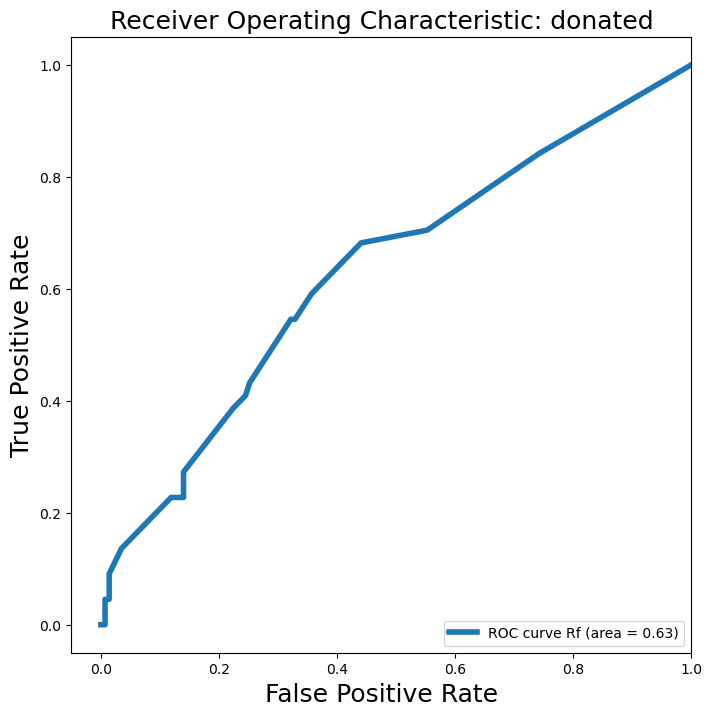

In [38]:
yhat_pp_log = rf_gride.predict_proba(X_test)
fpr,tpr,_ = roc_curve(y_test,yhat_pp_log[:,1])



plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label= 'ROC curve Rf (area = %0.2f)'% auc(fpr,tpr), linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: donated', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

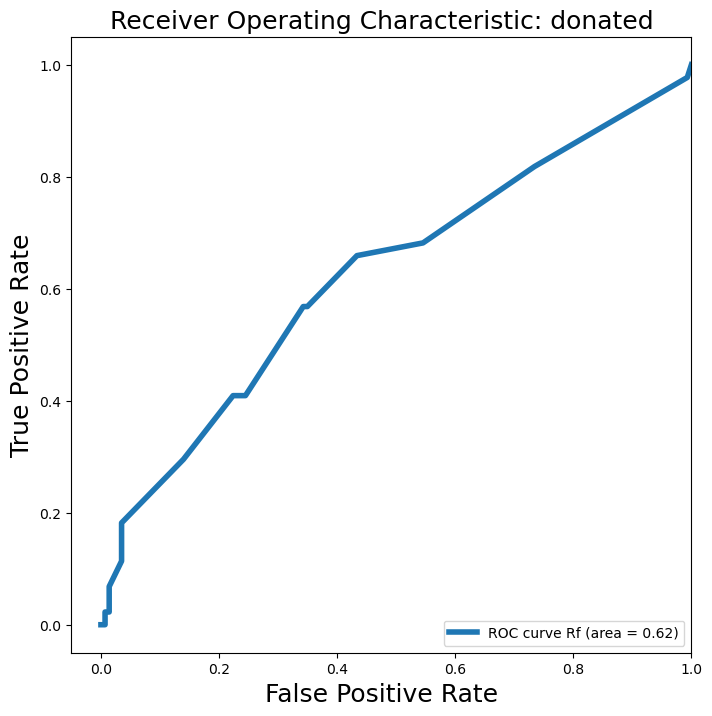

In [33]:

yhat_pp_log = rf.predict_proba(X_test)
fpr,tpr,_ = roc_curve(y_test,yhat_pp_log[:,1])



plt.figure(figsize=[8,8])
plt.plot(fpr,tpr, label= 'ROC curve Rf (area = %0.2f)'% auc(fpr,tpr), linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: donated', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 9: Fit the Model

In [ ]:
# Fit model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [ ]:
# Evaluate model against training set

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [ ]:
# Evaluate model against test set

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



